In [49]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [50]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [51]:
NUM_CLASSES = 27

In [52]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [53]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [56]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 27)                297       
                                                                 
Total params: 1,367
Trainable params: 1,367
Non-trainable params: 0
_________________________________________________________________


In [57]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [58]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [59]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
27/30 [==========================>...] - ETA: 0s - loss: 3.3259 - accuracy: 0.0356 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 1s 10ms/step - loss: 3.3220 - accuracy: 0.0366 - val_loss: 3.2388 - val_accuracy: 0.0428
Epoch 2/1000
24/30 [=======================>......] - ETA: 0s - loss: 3.2476 - accuracy: 0.0547
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 3.2423 - accuracy: 0.0643 - val_loss: 3.1789 - val_accuracy: 0.2058
Epoch 3/1000
23/30 [======================>.......] - ETA: 0s - loss: 3.1790 - accuracy: 0.1223
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 3.1714 - accuracy: 0.1265 - val_loss: 3.0924 - val_accuracy: 0.2405
Epoch 4/1000
23/30 [======================>.......] - ETA: 0s - loss: 3.0992 - accuracy: 0.1726

26/30 [=========================>....] - ETA: 0s - loss: 1.7692 - accuracy: 0.4168
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.7687 - accuracy: 0.4159 - val_loss: 1.1984 - val_accuracy: 0.6497
Epoch 56/1000
21/30 [====================>.........] - ETA: 0s - loss: 1.7393 - accuracy: 0.4182
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.7492 - accuracy: 0.4210 - val_loss: 1.1791 - val_accuracy: 0.6513
Epoch 57/1000
30/30 [==============================] - ETA: 0s - loss: 1.7406 - accuracy: 0.4275
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 1.7406 - accuracy: 0.4275 - val_loss: 1.1757 - val_accuracy: 0.6610
Epoch 58/1000
30/30 [==============================] - ETA: 0s - loss: 1.7331 - accuracy: 0.4188
Epoch 58

 1/30 [>.............................] - ETA: 0s - loss: 1.4348 - accuracy: 0.5781
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.5068 - accuracy: 0.5055 - val_loss: 0.8851 - val_accuracy: 0.8103
Epoch 110/1000
18/30 [=================>............] - ETA: 0s - loss: 1.4854 - accuracy: 0.5161
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.4902 - accuracy: 0.5052 - val_loss: 0.8755 - val_accuracy: 0.8200
Epoch 111/1000
21/30 [====================>.........] - ETA: 0s - loss: 1.5011 - accuracy: 0.4963
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.4971 - accuracy: 0.4972 - val_loss: 0.8830 - val_accuracy: 0.8168
Epoch 112/1000
25/30 [========================>.....] - ETA: 0s - loss: 1.5429 - accuracy: 0.4903
Ep

Epoch 136/1000
30/30 [==============================] - ETA: 0s - loss: 1.4498 - accuracy: 0.5098
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.4498 - accuracy: 0.5098 - val_loss: 0.7861 - val_accuracy: 0.8491
Epoch 137/1000
17/30 [================>.............] - ETA: 0s - loss: 1.4131 - accuracy: 0.5257
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 1.4234 - accuracy: 0.5252 - val_loss: 0.7669 - val_accuracy: 0.8789
Epoch 138/1000
22/30 [=====================>........] - ETA: 0s - loss: 1.4227 - accuracy: 0.5302
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.4287 - accuracy: 0.5311 - val_loss: 0.7680 - val_accuracy: 0.8555
Epoch 139/1000
22/30 [=====================>........] - ETA: 0s - loss: 1.3973 - accu

Epoch 163/1000
17/30 [================>.............] - ETA: 0s - loss: 1.3735 - accuracy: 0.5400
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 1.3621 - accuracy: 0.5448 - val_loss: 0.7043 - val_accuracy: 0.8886
Epoch 164/1000
19/30 [==================>...........] - ETA: 0s - loss: 1.3444 - accuracy: 0.5489
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.3749 - accuracy: 0.5343 - val_loss: 0.7088 - val_accuracy: 0.8741
Epoch 165/1000
18/30 [=================>............] - ETA: 0s - loss: 1.3769 - accuracy: 0.5369
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 1.3863 - accuracy: 0.5378 - val_loss: 0.7187 - val_accuracy: 0.8870
Epoch 166/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.3520 - accu

Epoch 190/1000
28/30 [===========================>..] - ETA: 0s - loss: 1.3619 - accuracy: 0.5349
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.3650 - accuracy: 0.5341 - val_loss: 0.6676 - val_accuracy: 0.8894
Epoch 191/1000
17/30 [================>.............] - ETA: 0s - loss: 1.3401 - accuracy: 0.5496
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 1.3492 - accuracy: 0.5467 - val_loss: 0.6662 - val_accuracy: 0.8910
Epoch 192/1000
24/30 [=======================>......] - ETA: 0s - loss: 1.3010 - accuracy: 0.5713
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.3052 - accuracy: 0.5664 - val_loss: 0.6621 - val_accuracy: 0.8894
Epoch 193/1000
23/30 [======================>.......] - ETA: 0s - loss: 1.3297 - accu

Epoch 217/1000
24/30 [=======================>......] - ETA: 0s - loss: 1.2811 - accuracy: 0.5531
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.2948 - accuracy: 0.5529 - val_loss: 0.6017 - val_accuracy: 0.8975
Epoch 218/1000
30/30 [==============================] - ETA: 0s - loss: 1.2769 - accuracy: 0.5680
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 1.2769 - accuracy: 0.5680 - val_loss: 0.6015 - val_accuracy: 0.9193
Epoch 219/1000
30/30 [==============================] - ETA: 0s - loss: 1.2755 - accuracy: 0.5610
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.2755 - accuracy: 0.5610 - val_loss: 0.6042 - val_accuracy: 0.9193
Epoch 220/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.1962 - accu

Epoch 244/1000
27/30 [==========================>...] - ETA: 0s - loss: 1.2117 - accuracy: 0.5966
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.2107 - accuracy: 0.5954 - val_loss: 0.5714 - val_accuracy: 0.9362
Epoch 245/1000
18/30 [=================>............] - ETA: 0s - loss: 1.2039 - accuracy: 0.5911
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.2041 - accuracy: 0.5892 - val_loss: 0.5665 - val_accuracy: 0.9435
Epoch 246/1000
25/30 [========================>.....] - ETA: 0s - loss: 1.2273 - accuracy: 0.5969
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.2361 - accuracy: 0.5957 - val_loss: 0.5639 - val_accuracy: 0.9500
Epoch 247/1000
15/30 [==============>...............] - ETA: 0s - loss: 1.1896 - accu

Epoch 271/1000
17/30 [================>.............] - ETA: 0s - loss: 1.1913 - accuracy: 0.6048
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.2017 - accuracy: 0.5987 - val_loss: 0.5485 - val_accuracy: 0.9387
Epoch 272/1000
19/30 [==================>...........] - ETA: 0s - loss: 1.1738 - accuracy: 0.6024
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.1850 - accuracy: 0.5995 - val_loss: 0.5401 - val_accuracy: 0.9508
Epoch 273/1000
19/30 [==================>...........] - ETA: 0s - loss: 1.2098 - accuracy: 0.6003
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 1.2012 - accuracy: 0.6013 - val_loss: 0.5510 - val_accuracy: 0.9362
Epoch 274/1000
23/30 [======================>.......] - ETA: 0s - loss: 1.1667 - accu

Epoch 298/1000
19/30 [==================>...........] - ETA: 0s - loss: 1.1527 - accuracy: 0.6197
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.1652 - accuracy: 0.6118 - val_loss: 0.5159 - val_accuracy: 0.9387
Epoch 299/1000
18/30 [=================>............] - ETA: 0s - loss: 1.1902 - accuracy: 0.5968
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 8ms/step - loss: 1.1857 - accuracy: 0.6016 - val_loss: 0.5154 - val_accuracy: 0.9387
Epoch 300/1000
27/30 [==========================>...] - ETA: 0s - loss: 1.1918 - accuracy: 0.5992
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.2015 - accuracy: 0.5976 - val_loss: 0.5185 - val_accuracy: 0.9693
Epoch 301/1000
21/30 [====================>.........] - ETA: 0s - loss: 1.1480 - accu

Epoch 325/1000
18/30 [=================>............] - ETA: 0s - loss: 1.1295 - accuracy: 0.6176
Epoch 325: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 1.1392 - accuracy: 0.6221 - val_loss: 0.5032 - val_accuracy: 0.9459
Epoch 326/1000
26/30 [=========================>....] - ETA: 0s - loss: 1.1452 - accuracy: 0.6142
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.1346 - accuracy: 0.6197 - val_loss: 0.5125 - val_accuracy: 0.9419
Epoch 327/1000
27/30 [==========================>...] - ETA: 0s - loss: 1.1384 - accuracy: 0.6192
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.1424 - accuracy: 0.6145 - val_loss: 0.4968 - val_accuracy: 0.9556
Epoch 328/1000
18/30 [=================>............] - ETA: 0s - loss: 1.1124 - accu

Epoch 352/1000
20/30 [===================>..........] - ETA: 0s - loss: 1.1418 - accuracy: 0.6176
Epoch 352: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 1.1280 - accuracy: 0.6234 - val_loss: 0.4872 - val_accuracy: 0.9492
Epoch 353/1000
30/30 [==============================] - ETA: 0s - loss: 1.1041 - accuracy: 0.6369
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.1041 - accuracy: 0.6369 - val_loss: 0.4982 - val_accuracy: 0.9395
Epoch 354/1000
17/30 [================>.............] - ETA: 0s - loss: 1.1199 - accuracy: 0.6153
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.1086 - accuracy: 0.6266 - val_loss: 0.4811 - val_accuracy: 0.9427
Epoch 355/1000
28/30 [===========================>..] - ETA: 0s - loss: 1.1498 - accu

Epoch 379/1000
15/30 [==============>...............] - ETA: 0s - loss: 1.1170 - accuracy: 0.6281
Epoch 379: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 1.1003 - accuracy: 0.6261 - val_loss: 0.4785 - val_accuracy: 0.9621
Epoch 380/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.4564 - accuracy: 0.5391
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 1.1126 - accuracy: 0.6191 - val_loss: 0.4705 - val_accuracy: 0.9613
Epoch 381/1000
20/30 [===================>..........] - ETA: 0s - loss: 1.1199 - accuracy: 0.6309
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.1006 - accuracy: 0.6396 - val_loss: 0.4794 - val_accuracy: 0.9500
Epoch 382/1000
30/30 [==============================] - ETA: 0s - loss: 1.1007 - accu

In [60]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.9435


In [61]:
model = tf.keras.models.load_model(model_save_path)

In [62]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.7068888e-03 6.5944236e-11 8.8692111e-08 1.0356440e-05 4.4843004e-05
 9.7302564e-06 2.4730355e-15 4.8492379e-13 1.6575006e-03 2.9995391e-02
 5.8399825e-19 2.7465751e-07 2.9033199e-14 2.5768519e-12 5.3995144e-08
 7.7030954e-10 3.9001091e-09 2.0430558e-26 3.2361190e-06 1.5160545e-04
 5.5543652e-18 3.2915224e-23 2.8799128e-22 3.6891765e-13 9.6308696e-01
 3.8924532e-17 1.3330673e-03]
24


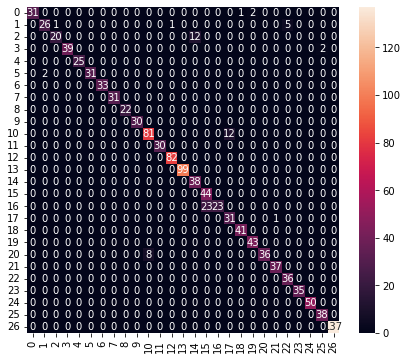

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.93      0.79      0.85        33
           2       0.95      0.62      0.75        32
           3       1.00      0.95      0.97        41
           4       1.00      1.00      1.00        25
           5       1.00      0.94      0.97        33
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        31
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        30
          10       0.91      0.87      0.89        93
          11       1.00      1.00      1.00        30
          12       0.99      1.00      0.99        82
          13       1.00      1.00      1.00        99
          14       0.76      1.00      0.86        38
          15       0.66      1.00      0.79        44
          16       1.00      0.50      0.67        46
     

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [64]:
model.save(model_save_path, include_optimizer=False)

In [65]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp42y44usa\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmp42y44usa\assets


7472

In [66]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [67]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [68]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [69]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1.32 ms


In [70]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.7068874e-03 6.5944111e-11 8.8692296e-08 1.0356441e-05 4.4842967e-05
 9.7302482e-06 2.4730550e-15 4.8492758e-13 1.6574953e-03 2.9995380e-02
 5.8400058e-19 2.7465751e-07 2.9033203e-14 2.5768576e-12 5.3995254e-08
 7.7030954e-10 3.9001242e-09 2.0430558e-26 3.2361222e-06 1.5160533e-04
 5.5543867e-18 3.2915228e-23 2.8799234e-22 3.6891765e-13 9.6308708e-01
 3.8924393e-17 1.3330661e-03]
24
